In [10]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from tickets import *
from minutes import *
from models import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
counts_2018 = np.genfromtxt('2018_count_250108_0209.csv', delimiter=',', skip_header=1)
day_min_counts = Minutes.day_min(counts_2018[:, 0])
print(f"Loaded {len(counts_2018)} rows of data")
print(f"The shape is {day_min_counts.shape}")

tickets_2018 = np.genfromtxt('2018_tickets_250108_0209.csv', delimiter=',', skip_header=1)
day_min_tickets = Minutes.day_min(tickets_2018)
print(f"Loaded {len(day_min_tickets)} rows of data")
print(f"The shape is {tickets_2018.shape}")
print()
print(f"The mean day is {np.mean(day_min_tickets[:, 0])}")
print(f"The std day is {np.std(day_min_tickets[:, 0])}")
print(f"The mean min is {np.mean(day_min_tickets[:, 1])}")
print(f"The std min is {np.std(day_min_tickets[:, 1])}")

Loaded 31856 rows of data
The shape is (31856, 2)
Loaded 160813 rows of data
The shape is (160813,)

The mean day is 29.77885494331926
The std day is 8.978221476042602
The mean min is 863.0213913054292
The std min is 255.18749935067723


In [12]:
all = Tickets()
all.add([[1, 60]])
day_min_all = Minutes.day_min(all.tickets)

parameters = [np.mean(day_min_tickets[:, 0]),
              np.std(day_min_tickets[:, 0]),
              np.mean(day_min_tickets[:, 1]),
              np.std(day_min_tickets[:, 1])]

transform = Minutes.get_transform(parameters)

day_c, min_c = transform(day_min_counts[:,0], day_min_counts[:,1])
radius_c = Minutes.radius(day_c, min_c)

day_a, min_a = transform(day_min_all[:,0], day_min_all[:,1])
radius_a = Minutes.radius(day_a, min_a)

radius_max = np.max(radius_a)

print(f"Maximum radius is: {radius_max:.3f}")

Maximum radius is: 4.772


In [44]:
def get_band_distribution(minute,
                          radius_c, counts_2018, radius_a, transform,
                          std_increment=0.125):

    day_c, min_c = Minutes.get_day_min(minute[0])
    day_t, min_t = transform(day_c, min_c)
    radius = Minutes.radius(day_t, min_t)
    
    if isinstance(std_increment, list):
        assert len(std_increment) == 2, "std_increment list must have two values"
        radius_min = radius - std_increment[0]
        radius_max = radius + std_increment[1]
    elif isinstance(std_increment, float):
        radius_min = radius - std_increment
        radius_max = radius + std_increment
    else:
        raise ValueError("std_increment must be a list of length 2 or a float")

    d = evaluate_ticket_dist_i(radius_min, radius_max,
                             radius_c, counts_2018[:, 1],
                             radius_a)
    return d

Minute: 41130


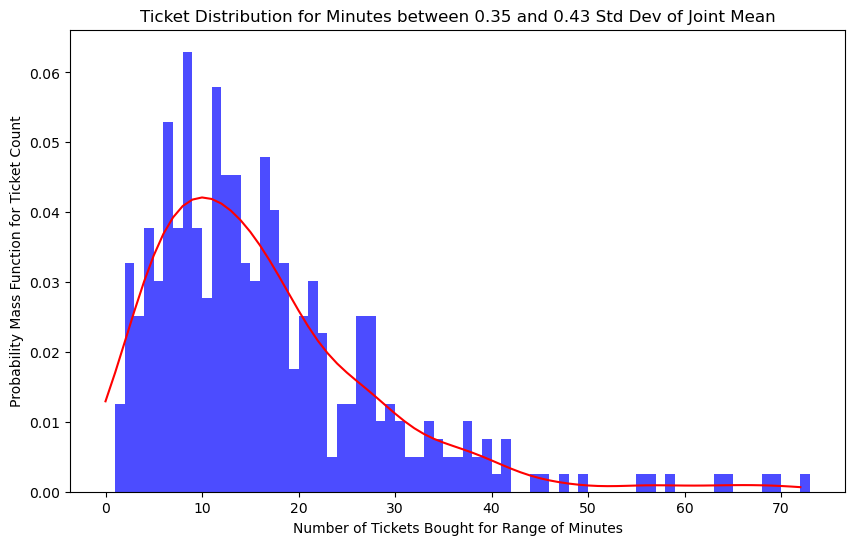

In [49]:
# minute = Minutes.get_minutes([['April'], 25, 13, 10])
minute = Minutes.get_minutes([['April'], 29, 13, 30])
print(f"Minute: {minute[0]}")

d = get_band_distribution(minute,
                          radius_c, counts_2018, radius_a, transform,
                          std_increment=[-.125, .2])
d.hist();